In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import basename, exists
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, log_loss, roc_auc_score, RocCurveDisplay, roc_curve


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        
download('https://github.com/AllenDowney/AstronomicalData/raw/main/' + 'az-paper-twocol.mplstyle')
plt.style.use('./az-paper-twocol.mplstyle')

In [153]:
y_proba = pd.read_csv('run3\\y_proba.csv',index_col=0)
y_test = pd.read_csv('run3\\y_test.csv',index_col=0)
y_pred=pd.read_csv('run3\\y_pred.csv',index_col=0)

N=len(y_proba)*10

tempdf = pd.DataFrame(np.zeros((0,4)),columns=['prob0','prob1','pred_class','class'])
results = pd.DataFrame()

for i in range(1,6):
    tempdf['prob0']=y_proba['class0 iteration '+str(i)]      
    tempdf['prob1']=y_proba['class1 iteration '+str(i)]
    tempdf['class']=y_test['iteration '+str(i)]
    tempdf['pred_class']=y_pred['iteration '+str(i)]
    results=pd.concat([results,tempdf],ignore_index=True)

y_proba = results['prob1']
y_test=results['class']
y_pred=results['pred_class']

results.to_csv('run3\\allresults.csv')


The Neural Network accuracy is 74.91525423728814
The Neural Network ROC AUC Scores are: 0.650481307914387
The Neural Network's Weighted Average ROC AUC Score is: 0.650481307914387
The Neural Network's Logarithmic Loss Score is: 9.041458816253117
The Neural Network F1 Score is: 0.8545454545454546
The Neural Network Confusion Matrix is:
[[  29   24]
 [ 568 1739]]


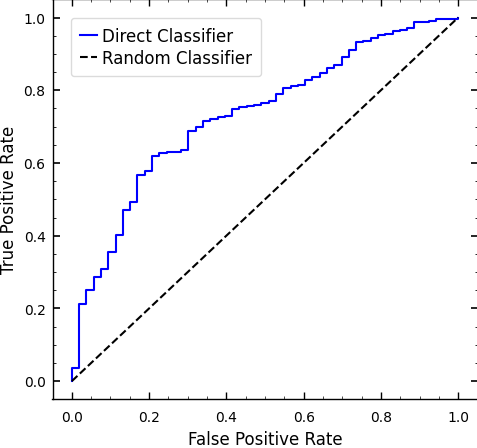

In [154]:

accuracy = accuracy_score(y_test, y_pred)*100

confusion = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc_weightedavg = roc_auc_score(y_test,y_pred,average='weighted')
logloss = log_loss(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test,y_proba)

print('The Neural Network accuracy is ' + str(accuracy))
print('The Neural Network ROC AUC Scores are: '+str(roc_auc))
print("The Neural Network's Weighted Average ROC AUC Score is: " + str(roc_auc_weightedavg))
print("The Neural Network's Logarithmic Loss Score is: " + str(logloss))
print('The Neural Network F1 Score is: '+str(f1))
print('The Neural Network Confusion Matrix is:')
print(confusion)

resultcols = ['Accuracy', 'ROC AUC', 'ROC Weighted Av', 'Logarithmic Loss',
            'F1 Score', 'CMatrix11','CMatrix12', 'CMatrix21', 'CMatrix22']
resultarray = np.array((accuracy,roc_auc,roc_auc_weightedavg,logloss,f1,
                        confusion[0,0],confusion[0,1],confusion[1,0],confusion[1,1]))
rocresultcols = ['FPR','TPR','Thresholds']
rocresultarray = np.array([fpr,tpr,thresholds])
#print(rocresultarray)
results1 = pd.DataFrame([resultarray],columns=resultcols)
rocresults = pd.DataFrame(np.array([fpr,tpr,thresholds]).transpose(),columns=rocresultcols)


fig, ax = plt.subplots(figsize=(5,5))
N=12
ax.plot(fpr,tpr,color='blue',label='Direct Classifier')
ax.plot([0,1],[0,1],linestyle='dashed',color='black',label='Random Classifier')
ax.set_xlabel('False Positive Rate',fontsize=N)
ax.set_ylabel('True Positive Rate',fontsize=N)
ax.legend(fontsize=N)

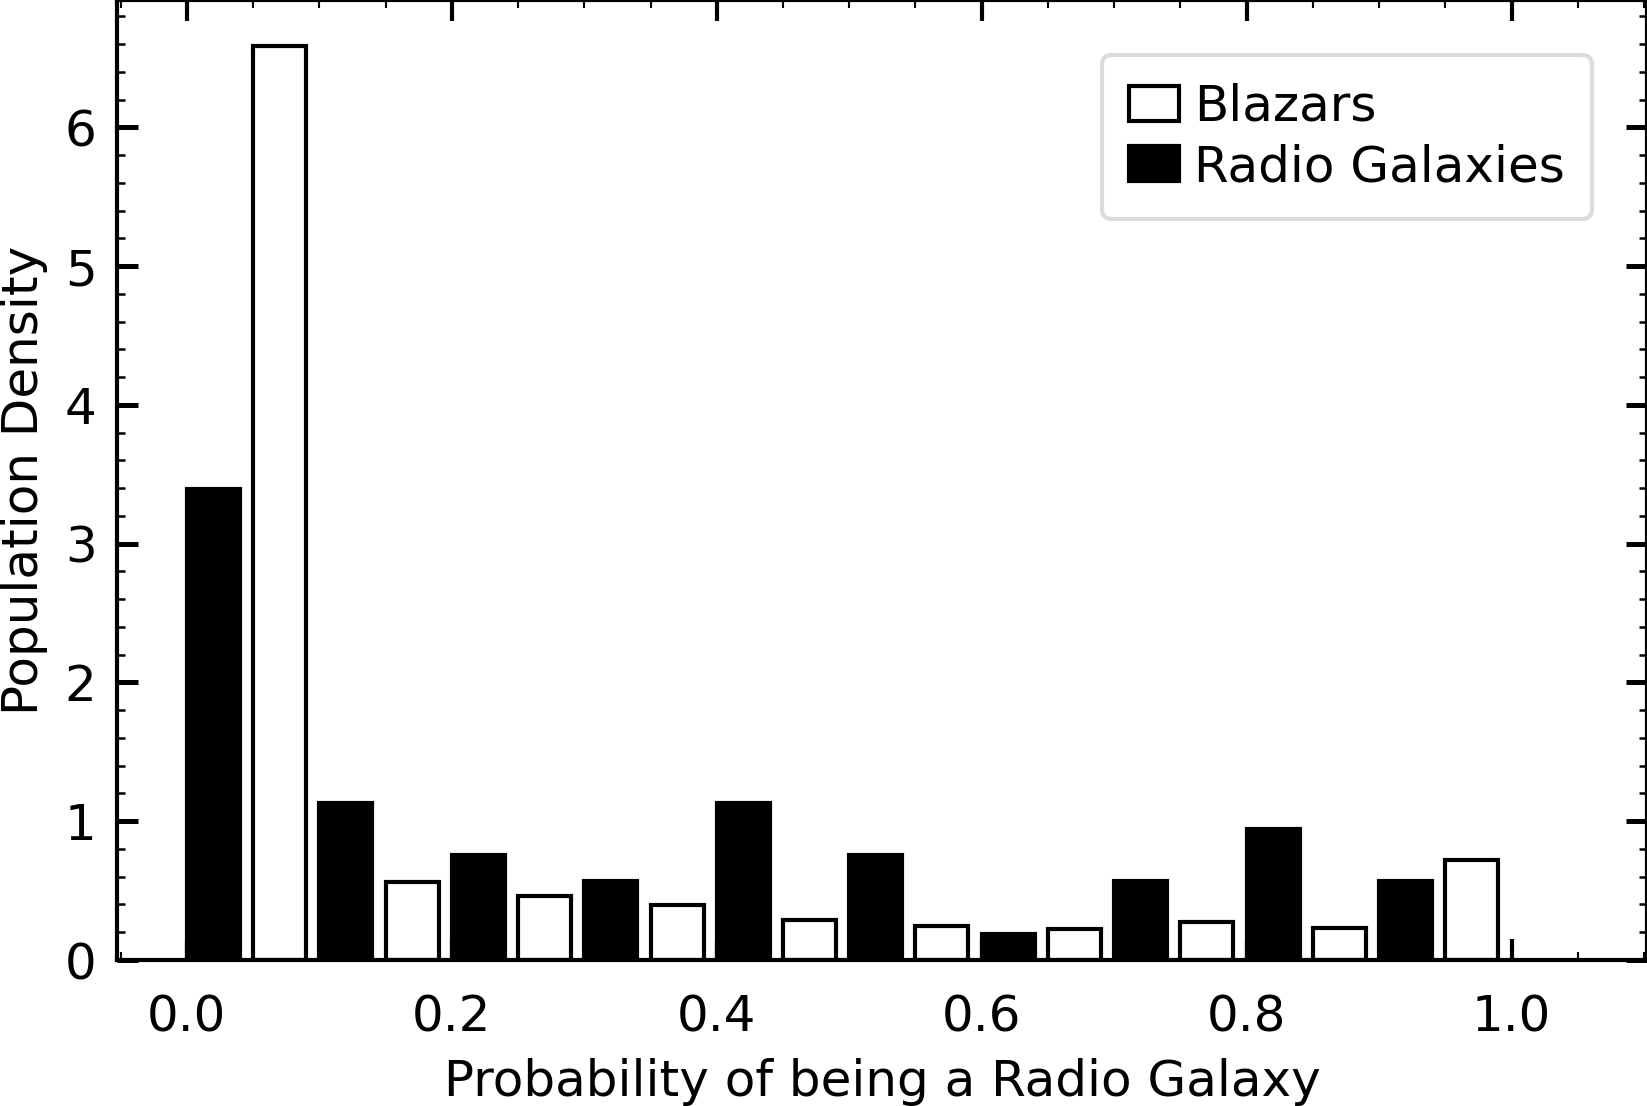

In [ ]:

fig,ax=plt.subplots(figsize=(6,4),dpi=300)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.hist(results.loc[results['class']==1,['prob0']],np.arange(0,1.1,0.1),density=True,
        width=0.04,edgecolor='black',align='right',color='white',label='Blazars')
ax.hist(results.loc[results['class']==0,['prob0']],np.arange(0,1.1,0.1),density=True,
        width=0.04,edgecolor='black',align='mid',color='black',label='Radio Galaxies')
ax.set_xlabel('Probability of being a Radio Galaxy',fontsize=12)
ax.set_ylabel('Population Density',fontsize=12)
ax.legend(fontsize=12)